In [0]:
! pip install tensorflow==1.15.0


     |████████████████████████████████| 412.3MB 44kB/s 
     |████████████████████████████████| 512kB 36.1MB/s 
     |████████████████████████████████| 3.8MB 34.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=c2f0ab88f884c081fcac25b03772f99e049242dc5264b6c0dca0a777fd070e35
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: 

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
activation_64 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
activation_65 (Activation)   (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 9, 9, 32)        

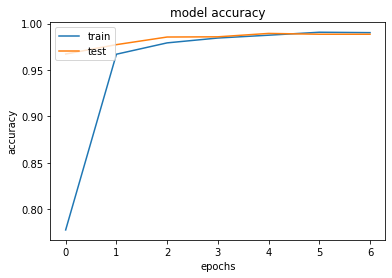

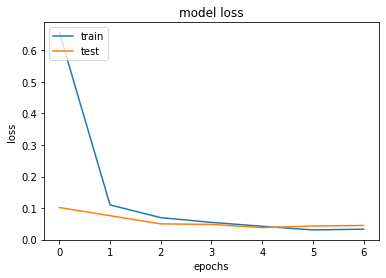

In [0]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 13 15:18:42 2020

@author:pradheep
"""
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("/content/drive/My Drive/digit_classification/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("/content/drive/My Drive/digit_classification/y.pickle","rb")
y = pickle.load(pickle_in)



X = X/255.0


model=Sequential()
model.add(Conv2D(32, (3, 3),input_shape=(50,50,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Dropout(0.3))
model.add(Dense(10))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_history=model.fit(X, y, batch_size=32, epochs=7, validation_split=0.3)

plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save("weight1.h5")